In [1]:
import numpy as np, pandas as pd
from numba import jit
import warnings
warnings.filterwarnings("ignore")

In [2]:
@jit(nopython=True)
def lorenz(x,y,z,sigma=10,rho=28,beta=8/3):
    x1 = sigma * (y-x)
    y1 = x * (rho - z) - y
    z1 = (x * y) - (beta * z)
    
    return x1,y1,z1

In [3]:
x = 0.4
y = 0.4
z = 0.4

sigma = 10
rho = 28
beta = 8/3

lx = [x]
ly = [y]
lz = [z]

T = 1000
dt = 0.01
t = np.arange(0,T+dt,dt)

In [4]:
# Getting points for attractor using Euler's Method 

for i in range(len(t)):
    x_, y_, z_ = lorenz(lx[-1],ly[-1],lz[-1])
    
    lx+=[lx[-1]+(x_*dt)]
    ly+=[ly[-1]+(y_*dt)]
    lz+=[lz[-1]+(z_*dt)]

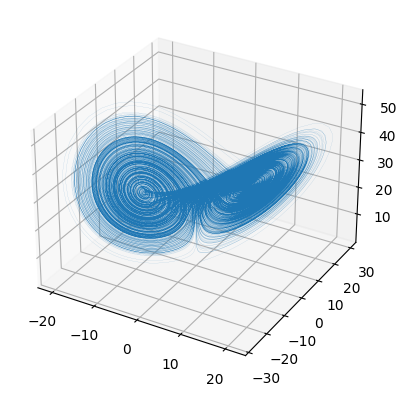

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot(lx,ly,lz,lw=0.05)

In [6]:
db = [[lx[i],ly[i],lz[i]] for i in range(len(t))]
db = pd.DataFrame(db)
db.columns = ('x(n)','y(n)','z(n)')

In [7]:
db

,x(n),y(n),z(n)
0,0.400000,0.400000,0.400000
1,0.400000,0.506400,0.390933
2,0.410640,0.611772,0.382534
3,0.430753,0.719063,0.374845
4,0.459584,0.830869,0.367947
...,...,...,...
99996,11.327321,13.489984,28.078564
99997,11.543587,13.346185,28.857856
99998,11.723847,13.113696,29.628942
99999,11.862832,12.791584,30.376266


In [8]:
db_ = db.shift(-1).iloc[:,-3:]
db_.columns = ["x(n+1)","y(n+1)","z(n+1)"]
db = pd.concat((db,db_),axis=1).iloc[:len(t)-1,:]
db

,x(n),y(n),z(n),x(n+1),y(n+1),z(n+1)
0,0.400000,0.400000,0.400000,0.400000,0.506400,0.390933
1,0.400000,0.506400,0.390933,0.410640,0.611772,0.382534
2,0.410640,0.611772,0.382534,0.430753,0.719063,0.374845
3,0.430753,0.719063,0.374845,0.459584,0.830869,0.367947
4,0.459584,0.830869,0.367947,0.496713,0.949552,0.361953
...,...,...,...,...,...,...
99995,11.080522,13.548511,27.305464,11.327321,13.489984,28.078564
99996,11.327321,13.489984,28.078564,11.543587,13.346185,28.857856
99997,11.543587,13.346185,28.857856,11.723847,13.113696,29.628942
99998,11.723847,13.113696,29.628942,11.862832,12.791584,30.376266


In [9]:
db.to_csv("data")